## Vaccination Data by County, NJ

In [377]:
import pandas as pd
import numpy as np
import requests
import time
from matplotlib import pyplot as plt
from config import v_key

In [378]:
d_state_covid = pd.read_csv("Data/NJ state time series.csv" )
#d_state_covid.head()
len(d_state_covid)

11319

In [398]:
#getting columns needed for vaccination data
d_state_covid['county'] = d_state_covid['county'].str[:-7]
d_state_covid_conv_df=d_state_covid[['date','county','fips','actuals.cases','actuals.deaths','actuals.newCases',
         'actuals.vaccinationsInitiated','actuals.vaccinationsCompleted',
         'actuals.vaccinesAdministered','actuals.newDeaths']]
clean_vaccine_df =d_state_covid_conv_df.dropna(subset=['actuals.cases','actuals.deaths','actuals.newCases',
                                                    'actuals.vaccinationsInitiated','actuals.vaccinationsCompleted',
                                                    'actuals.vaccinesAdministered','actuals.newDeaths'])

clean_vaccine_df.head()
#clean_vaccine_df.dtypes
#len(clean_vaccine_df)

,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths
393,2021-02-18,Atlantic,34001,23833.0,546.0,153.0,35117.0,14104.0,49228.0,10.0
394,2021-02-19,Atlantic,34001,23909.0,549.0,76.0,35322.0,14712.0,50038.0,3.0
395,2021-02-20,Atlantic,34001,24048.0,551.0,139.0,35390.0,15004.0,50399.0,2.0
396,2021-02-21,Atlantic,34001,24131.0,551.0,83.0,36181.0,15890.0,52166.0,0.0
397,2021-02-22,Atlantic,34001,24207.0,552.0,76.0,36371.0,16576.0,52947.0,1.0


## Population Data by County, NJ

In [399]:
population_url ="https://api.covidactnow.org/v2/county/NJ.json?apiKey=" + v_key
population_response = requests.get(population_url).json()
#getting population data
fips=[]
population = []

for county_row in population_response:
    fips.append(int(county_row['fips']))
    population.append(county_row['population'])
    
population_dict = {
     "fips": fips,
     "Total Population": population}
    
population_data_total  = pd.DataFrame(population_dict)
population_data_total.head()


,fips,Total Population
0,34001,263670
1,34003,932202
2,34005,445349
3,34007,506471
4,34009,92039


In [400]:
# merging vaccination data with population
vaccines_mer_pd = clean_vaccine_df.merge(population_data_total, how ="left", on ="fips")
vaccines_mer_pd.head()

,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths,Total Population
0,2021-02-18,Atlantic,34001,23833.0,546.0,153.0,35117.0,14104.0,49228.0,10.0,263670
1,2021-02-19,Atlantic,34001,23909.0,549.0,76.0,35322.0,14712.0,50038.0,3.0,263670
2,2021-02-20,Atlantic,34001,24048.0,551.0,139.0,35390.0,15004.0,50399.0,2.0,263670
3,2021-02-21,Atlantic,34001,24131.0,551.0,83.0,36181.0,15890.0,52166.0,0.0,263670
4,2021-02-22,Atlantic,34001,24207.0,552.0,76.0,36371.0,16576.0,52947.0,1.0,263670


## Vaccination % Population By County, NJ 

In [401]:
percent_counties_vaccine = pd.DataFrame(vaccines_mer_pd[["date","fips","county"]])

percent_counties_vaccine["Percent completed"]= vaccines_mer_pd["actuals.vaccinationsCompleted"]/vaccines_mer_pd["Total Population"]*100
percent_counties_vaccine["Percent initiated"]= vaccines_mer_pd["actuals.vaccinationsInitiated"]/vaccines_mer_pd["Total Population"]*100
percent_counties_vaccine["Percent of Cases/Total Population"] =vaccines_mer_pd['actuals.cases']/vaccines_mer_pd["Total Population"]*100 
percent_vaccine_round= percent_counties_vaccine.round(decimals=2)
percent_vaccine_round.head()


,date,fips,county,Percent completed,Percent initiated,Percent of Cases/Total Population
0,2021-02-18,34001,Atlantic,5.35,13.32,9.04
1,2021-02-19,34001,Atlantic,5.58,13.40,9.07
2,2021-02-20,34001,Atlantic,5.69,13.42,9.12
3,2021-02-21,34001,Atlantic,6.03,13.72,9.15
4,2021-02-22,34001,Atlantic,6.29,13.79,9.18


In [402]:
#Date - Jun 2021 when data from all counties are available
Data_date = "2021-06-26"
percent_vaccine = percent_counties_vaccine.loc[percent_counties_vaccine["date"]==Data_date].sort_values(by=['Percent completed'], ascending =False)
percent_vaccine_round= percent_vaccine.round(decimals=2)

percent_vaccine_round.head()


,date,fips,county,Percent completed,Percent initiated,Percent of Cases/Total Population
1902,2021-06-26,34027,Morris,61.02,67.34,10.24
2456,2021-06-26,34035,Somerset,60.29,67.87,9.19
669,2021-06-26,34009,Cape May,56.17,61.01,10.09
263,2021-06-26,34003,Bergen,55.75,61.82,11.25
1627,2021-06-26,34023,Middlesex,54.32,61.95,11.23


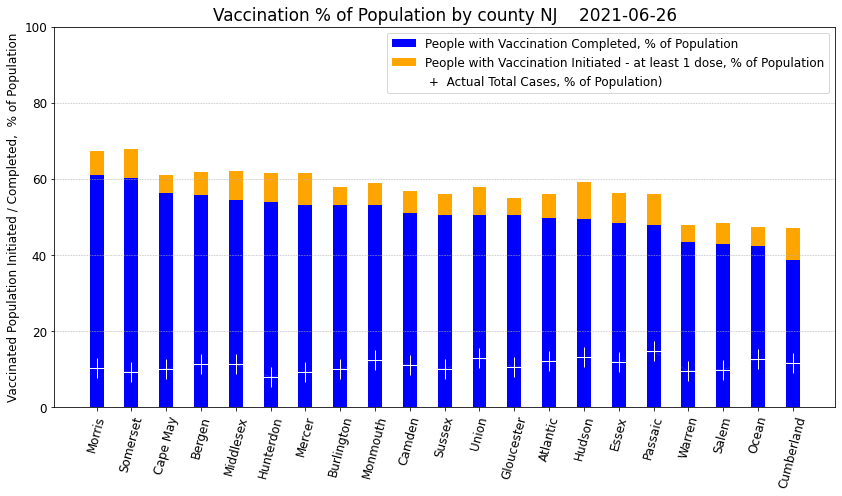

In [408]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
header = ['People with Vaccination Completed, % of Population','People with Vaccination Initiated - at least 1 dose, % of Population',
           ' +  Actual Total Cases, % of Population)']
dataset = [percent_vaccine["Percent completed"],percent_vaccine["Percent initiated"]]
X_AXIS = percent_vaccine_round["county"]
Y_AXIS = percent_vaccine_round["Percent of Cases/Total Population"]

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.0, 7.0)

configs = dataset[0]
N = len(configs)
ind = np.arange(N)
width = 0.4
 
p1 = plt.bar(ind, dataset[0], width, color='blue')
p2 = plt.bar(ind, np.array(dataset[1])-np.array(dataset[0]), width, bottom=dataset[0], color='orange')
p =  plt.plot(X_AXIS,Y_AXIS, color = "white", marker = '+', ms= 20, mfc = "r", linewidth = 0.1) 

plt.ylim([0,100])
plt.yticks(fontsize=12)
plt.ylabel("Vaccinated Population Initiated / Completed,  % of Population", fontsize=12)
plt.xticks(ind, X_AXIS, fontsize=12, rotation=75)
plt.title("Vaccination % of Population by county NJ    "  +  (Data_date))
plt.legend((p1[0], p2[0], p[0]), (header[0], header[1], header[2]), fontsize=12)
plt.grid(axis = "y", linestyle = "--", linewidth = 0.5)
plt.savefig("../Images/Vaccination_counties_NJ_Jun2021.png")

plt.show()



## Vaccination - Daily Cases, February 2021 - July 2021, by County NJ
* time frame was adjusted to data, as when available for all counties in NJ 

In [409]:
#adding daily number of vaccination_initiated cases and vaccination_completed cases 
time_vaccine_df = pd.DataFrame(vaccines_mer_pd)
time_vaccine_df.head()
time_vaccine_df =time_vaccine_df.sort_values(['county', 'date'])
time_vaccine_df["delta_init"]=time_vaccine_df['actuals.vaccinationsInitiated'].diff()
time_vaccine_df["delta_complete"]=time_vaccine_df['actuals.vaccinationsCompleted'].diff()
index_county_df = time_vaccine_df.set_index(time_vaccine_df["county"]).fillna(0) 
index_county_df.loc[index_county_df['delta_init'] <0]=0
index_county_df.loc[index_county_df['delta_complete'] <0]=0
index_county_df.head()
n_county_vaccine_df = index_county_df.drop(columns = ['actuals.deaths','actuals.vaccinesAdministered','actuals.newDeaths'])
n_county_vaccine_df.head()

,date,county,fips,actuals.cases,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,Total Population,delta_init,delta_complete
county,,,,,,,,,,
Atlantic,2021-02-18,Atlantic,34001,23833.0,153.0,35117.0,14104.0,263670,0.0,0.0
Atlantic,2021-02-19,Atlantic,34001,23909.0,76.0,35322.0,14712.0,263670,205.0,608.0
Atlantic,2021-02-20,Atlantic,34001,24048.0,139.0,35390.0,15004.0,263670,68.0,292.0
Atlantic,2021-02-21,Atlantic,34001,24131.0,83.0,36181.0,15890.0,263670,791.0,886.0
Atlantic,2021-02-22,Atlantic,34001,24207.0,76.0,36371.0,16576.0,263670,190.0,686.0


In [410]:
nc_vaccine_df = n_county_vaccine_df.rename(columns={'county':'County','date':'Date','fips':'Fips','actuals.vaccinationsInitiated':'Vaccination Initiated','actuals.vaccinationsCompleted':'Vaccination Completed',
                               'delta_init':'Vaccination Iniciated by Day','delta_complete': 'Vaccination Completed by day','actuals.cases':'Total New Cases','actuals.newCases':'Daily Cases', 
                               'Total Population':'Total Population'})
nc_vaccine_df.head()


,Date,County,Fips,Total New Cases,Daily Cases,Vaccination Initiated,Vaccination Completed,Total Population,Vaccination Iniciated by Day,Vaccination Completed by day
county,,,,,,,,,,
Atlantic,2021-02-18,Atlantic,34001,23833.0,153.0,35117.0,14104.0,263670,0.0,0.0
Atlantic,2021-02-19,Atlantic,34001,23909.0,76.0,35322.0,14712.0,263670,205.0,608.0
Atlantic,2021-02-20,Atlantic,34001,24048.0,139.0,35390.0,15004.0,263670,68.0,292.0
Atlantic,2021-02-21,Atlantic,34001,24131.0,83.0,36181.0,15890.0,263670,791.0,886.0
Atlantic,2021-02-22,Atlantic,34001,24207.0,76.0,36371.0,16576.0,263670,190.0,686.0


In [412]:
#index_county_df = time_vaccine_df.set_index(time_vaccine_df["county"])
county_x= nc_vaccine_df.loc[nc_vaccine_df ['County'] == "Morris"]
county_x.head()


,Date,County,Fips,Total New Cases,Daily Cases,Vaccination Initiated,Vaccination Completed,Total Population,Vaccination Iniciated by Day,Vaccination Completed by day
county,,,,,,,,,,
Morris,2021-02-19,Morris,34027,36077.0,179.0,77921.0,38427.0,491845,898.0,2439.0
Morris,2021-02-20,Morris,34027,36220.0,143.0,78499.0,39229.0,491845,578.0,802.0
Morris,2021-02-21,Morris,34027,36343.0,123.0,79729.0,41080.0,491845,1230.0,1851.0
Morris,2021-02-22,Morris,34027,36515.0,172.0,82667.0,42928.0,491845,2938.0,1848.0
Morris,2021-02-23,Morris,34027,36691.0,176.0,85213.0,44157.0,491845,2546.0,1229.0


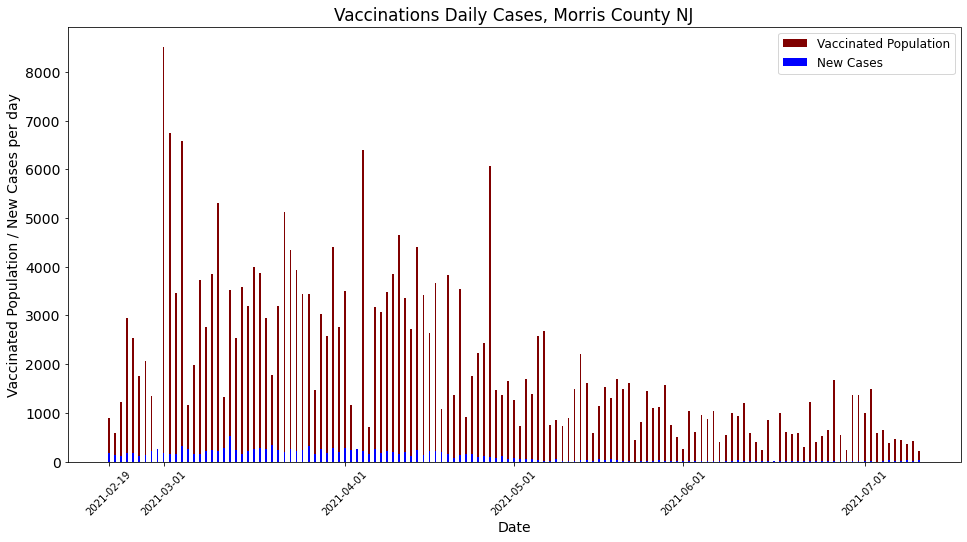

In [413]:
x_axis = county_x["Date"]
values = county_x['Vaccination Iniciated by Day']
  
fig = plt.figure(figsize = (16, 8))
fig.tight_layout()
# creating the bar plot
p1_M = plt.bar(x_axis, values, color ='maroon', width = 0.3)
p2_M = plt.bar(x_axis, county_x['Daily Cases'], color ='blue', width = 0.3)
  
plt.xlabel("Date")
plt.ylabel("Vaccinated Population / New Cases per day")
plt.xticks(['2021-02-19','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01'], fontsize=10, rotation=45)
plt.title("Vaccinations Daily Cases, Morris County NJ")
plt.legend((p1_M[0], p2_M[0]), ('Vaccinated Population', 'New Cases'), fontsize=12)

plt.savefig("../Images/Vaccinaction_Morris.png")

plt.show()

In [414]:
county_y=nc_vaccine_df .loc[nc_vaccine_df ['County'] == "Cumberland"]
county_y


,Date,County,Fips,Total New Cases,Daily Cases,Vaccination Initiated,Vaccination Completed,Total Population,Vaccination Iniciated by Day,Vaccination Completed by day
county,,,,,,,,,,
Cumberland,2021-02-19,Cumberland,34011,13871.0,48.0,15561.0,6879.0,149527,118.0,164.0
Cumberland,2021-02-20,Cumberland,34011,13938.0,67.0,15616.0,6987.0,149527,55.0,108.0
Cumberland,2021-02-21,Cumberland,34011,13955.0,17.0,15712.0,7204.0,149527,96.0,217.0
Cumberland,2021-02-22,Cumberland,34011,14011.0,56.0,15731.0,7296.0,149527,19.0,92.0
Cumberland,2021-02-23,Cumberland,34011,14047.0,36.0,15781.0,7370.0,149527,50.0,74.0
...,...,...,...,...,...,...,...,...,...,...
Cumberland,2021-07-07,Cumberland,34011,17261.0,5.0,71580.0,59861.0,149527,70.0,76.0
Cumberland,2021-07-08,Cumberland,34011,17263.0,2.0,71705.0,60064.0,149527,125.0,203.0
Cumberland,2021-07-09,Cumberland,34011,17264.0,1.0,71827.0,60196.0,149527,122.0,132.0


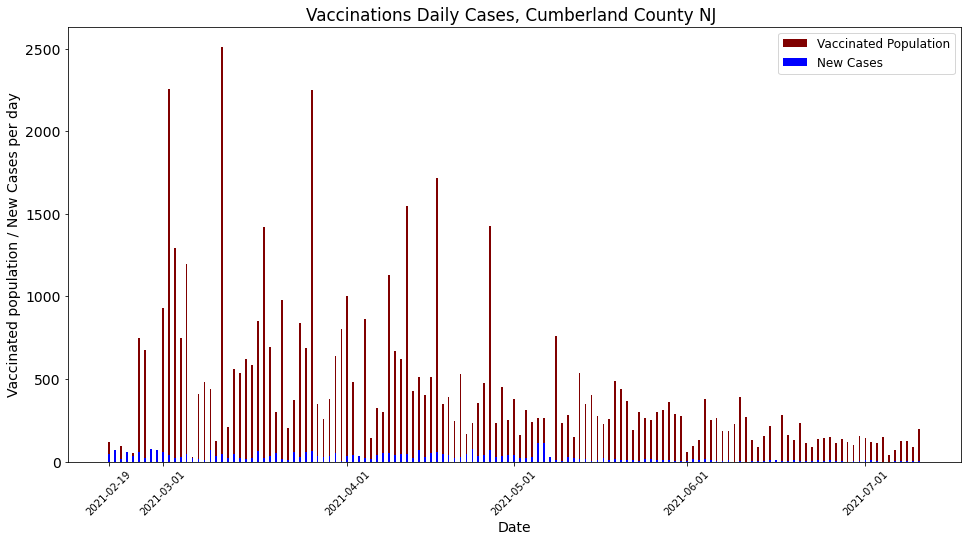

In [415]:
x_axis = county_y["Date"]
values = county_y['Vaccination Iniciated by Day']
  
fig = plt.figure(figsize = (16, 8))
fig.tight_layout()
# creating the bar plot
p1_C = plt.bar(x_axis, values, color ='maroon', width = 0.3)
p2_C = plt.bar(x_axis, county_y['Daily Cases'], color ='blue', width = 0.3)
 
plt.xlabel("Date")
plt.ylabel("Vaccinated population / New Cases per day")
plt.xticks(['2021-02-19','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01'], fontsize=10, rotation=45)
plt.title("Vaccinations Daily Cases, Cumberland County NJ ")
plt.legend((p1_C[0], p2_C[0]), ('Vaccinated Population', 'New Cases'), fontsize=12)


plt.savefig("../Images/Vaccinaction_Cumberland.png")

plt.show()

### Regression (Vaccinations vs Cases) 

In [416]:
# Morris completed
#plot: setting x_values, y_values 
x_values = county_x["Vaccination Completed"]
y_values =  county_x["Total New Cases"]


In [417]:
# Morris completed
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values, creating line equation string
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

y = 0.05x +37755.17


The r-squared is: 0.8673609028318877


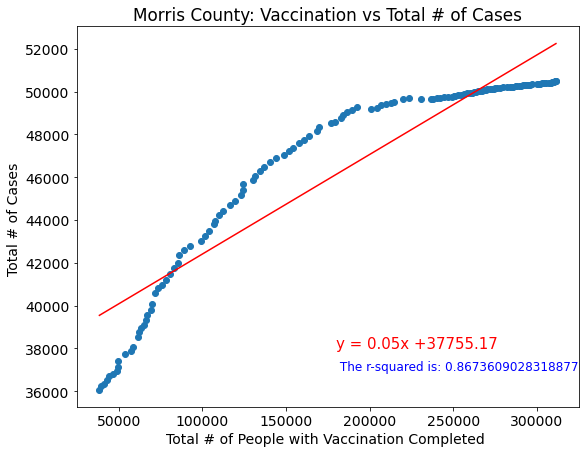

In [418]:
#Morris completed
# Create Plot
plt.figure(figsize=(9,7))
x_values = county_x["Vaccination Completed"]
y_values =  county_x["Total New Cases"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Morris County: Vaccination vs Total # of Cases")
plt.ylabel("Total # of Cases ")
plt.xlabel("Total # of People with Vaccination Completed ")

plt.annotate(line_eq,(180000,38000),fontsize=15,color="red")
plt.text(180000,37000, (f" The r-squared is: {rvalue**2}"), fontsize = 12, color ="b")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Linear_regr_Vaccinaction_Morris.png")

plt.show()

In [419]:
#Pearson's correlation coefficient Morris County - between people fully vaccinated (vacc. completed) vs total # of cases
import scipy.stats as st

vacc_compl = county_x.iloc[:,6]
cases_total = county_x.iloc[:,5]
print(f"The correlation coefficient between vaccination completed  and the total number of cases is {round(st.pearsonr(vacc_compl,cases_total)[0],2)}")

The correlation coefficient between vaccination completed  and the total number of cases is 0.98


In [420]:
#Pearson's correlation coefficient - between people vaccinated with 1-dose (vacc.initiated) vs total # of cases
import scipy.stats as st

vacc_init = county_x.iloc[:,5]
cases_total1 = county_x.iloc[:,5]
print(f"The correlation coefficient between vaccination initiated  and the total number of cases is {round(st.pearsonr(vacc_init ,cases_total1)[0],2)}")

The correlation coefficient between vaccination initiated  and the total number of cases is 1.0


In [421]:
# Cumberland completed
#plot: setting x_values, y_values 
x_values = county_y["Vaccination Completed"]
y_values =  county_y["Total New Cases"]


In [422]:
# Cumberland completed
# Performed a linear regression on Vaccination vs New Cases
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values, creating line equation string
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

y = 0.06x +13920.91


The r-squared is: 0.9799645384811047


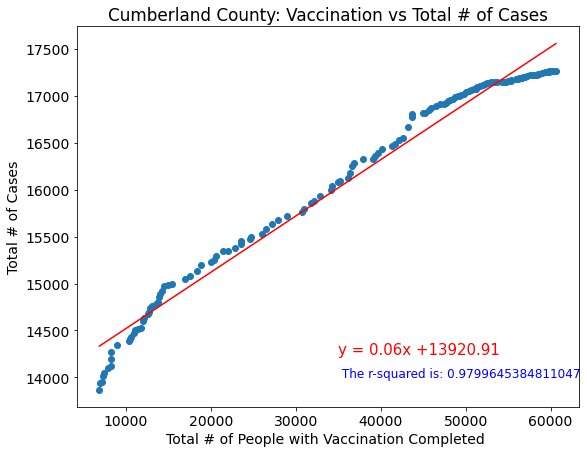

In [423]:
# Cumberland completed
# Create Plot
plt.figure(figsize=(9,7))
x_values = county_y["Vaccination Completed"]
y_values =  county_y["Total New Cases"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Cumberland County: Vaccination vs Total # of Cases")
plt.ylabel("Total # of Cases")
plt.xlabel("Total # of People with Vaccination Completed ")

plt.annotate(line_eq,(35000,14250),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.text(35000,14000, (f" The r-squared is: {rvalue**2}"), fontsize = 12, color ="b")
plt.savefig("../Images/Linear_regr_Vaccinaction_Cumberland.png")

plt.show()

In [424]:
#Pearson's correlation coefficient Cumberland- between people fully vaccinated (vacc. completed) vs total # of cases
import scipy.stats as st

vacc_compl = county_y.iloc[:,6]
cases_total = county_y.iloc[:,5]
print(f"The correlation coefficient between vaccination completed  and the total number of cases is {round(st.pearsonr(vacc_compl,cases_total)[0],2)}")

The correlation coefficient between vaccination completed  and the total number of cases is 0.99


In [425]:
#Pearson's correlation coefficient Cumberland - between people vaccinated with 1-dose (vacc.initiated) vs total # of cases

vacc_init = county_y.iloc[:,5]
cases_total1 = county_y.iloc[:,5]
print(f"The correlation coefficient between vaccination initiated  and the total number of cases is {round(st.pearsonr(vacc_init ,cases_total1)[0],2)}")

The correlation coefficient between vaccination initiated  and the total number of cases is 1.0


## Regression by County, NJ (all counties)
    

In [426]:
# counties in NJ for linear regression calculation 
county_list =percent_vaccine['county'].unique()
county_list

array(['Morris', 'Somerset', 'Cape May', 'Bergen', 'Middlesex',
       'Hunterdon', 'Mercer', 'Burlington', 'Monmouth', 'Camden',
       'Sussex', 'Union', 'Gloucester', 'Atlantic', 'Hudson', 'Essex',
       'Passaic', 'Warren', 'Salem', 'Ocean', 'Cumberland'], dtype=object)

Morris
The r-squared is: 0.8673609028318877
Somerset
The r-squared is: 0.8566204077396138
Cape May
The r-squared is: 0.9695213910129404
Bergen
The r-squared is: 0.8855183589921752
Middlesex
The r-squared is: 0.802150730558651
Hunterdon
The r-squared is: 0.8782777995456805
Mercer
The r-squared is: 0.8920197175930423
Burlington
The r-squared is: 0.8966351964296966
Monmouth
The r-squared is: 0.8562633963912234
Camden
The r-squared is: 0.9639723455466386
Sussex
The r-squared is: 0.8912988936725165
Union
The r-squared is: 0.845860263767051
Gloucester
The r-squared is: 0.9716363410678356
Atlantic
The r-squared is: 0.9318829635544598
Hudson
The r-squared is: 0.7505337599018855
Essex
The r-squared is: 0.7698372056426235
Passaic
The r-squared is: 0.8627411335195405
Warren
The r-squared is: 0.9158157654046728
Salem
The r-squared is: 0.9658248055961188
Ocean
The r-squared is: 0.8993335432171885
Cumberland
The r-squared is: 0.9799645384811047


C:\Users\dasa\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


,County,R-squared,Line Equation
0,Morris,[0.8673609028318877],[y = 0.05x +37755.17]
1,Somerset,[0.8566204077396138],[y = 0.04x +23291.54]
2,Cape May,[0.9695213910129404],[y = 0.05x +6910.82]
3,Bergen,[0.8855183589921752],[y = 0.06x +78150.04]
4,Middlesex,[0.802150730558651],[y = 0.04x +75270.21]
5,Hunterdon,[0.8782777995456805],[y = 0.05x +7030.37]
6,Mercer,[0.8920197175930423],[y = 0.03x +28296.63]
7,Burlington,[0.8966351964296966],[y = 0.04x +35256.82]
8,Monmouth,[0.8562633963912234],[y = 0.06x +57784.46]
9,Camden,[0.9639723455466386],[y = 0.05x +42947.25]


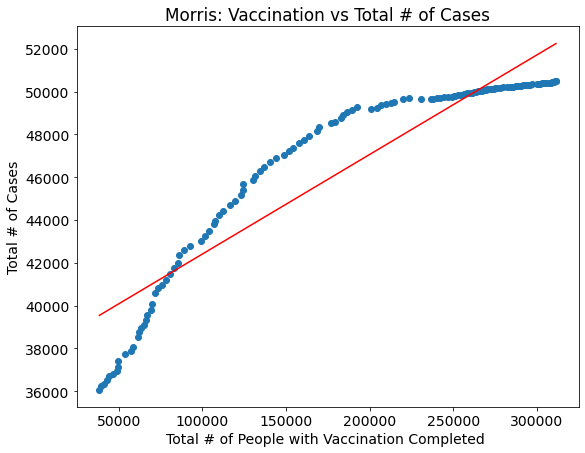

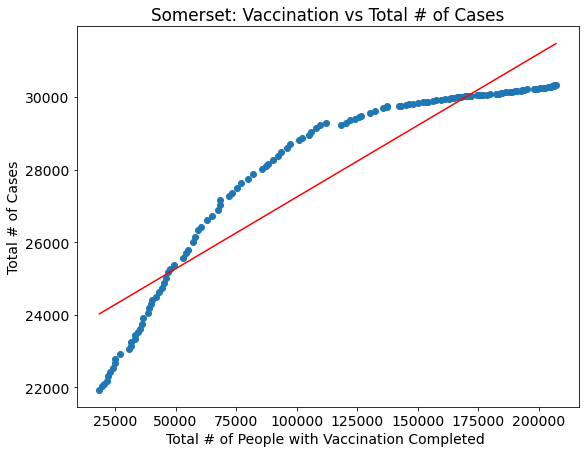

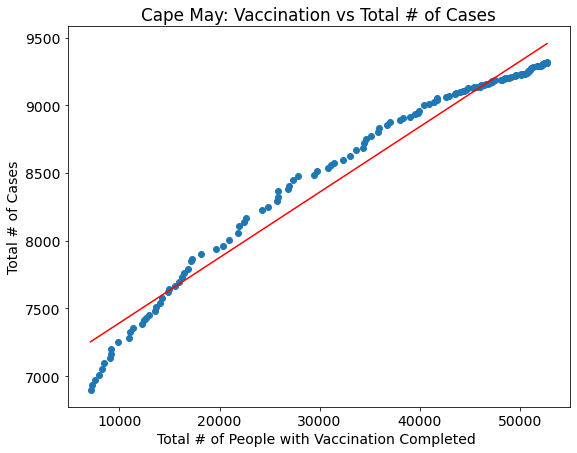

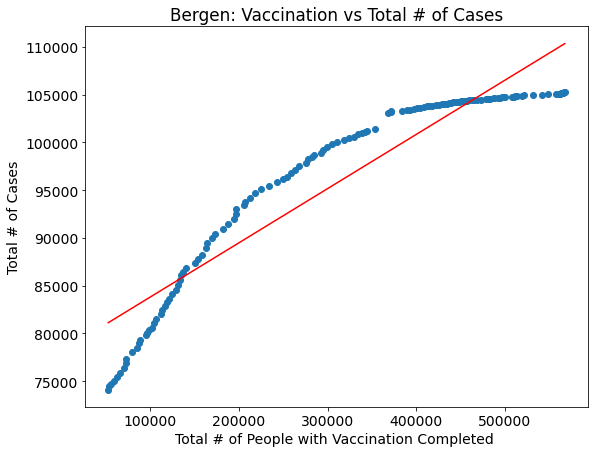

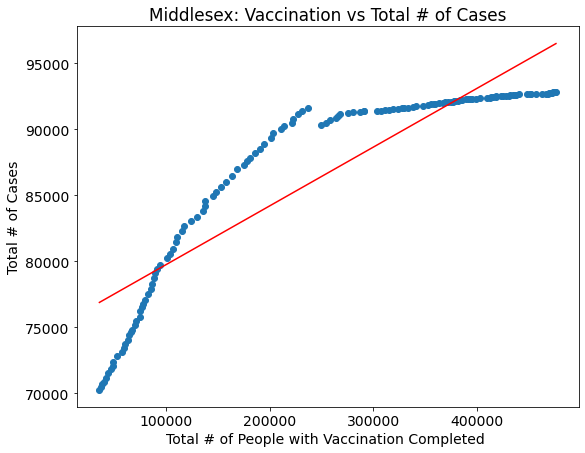

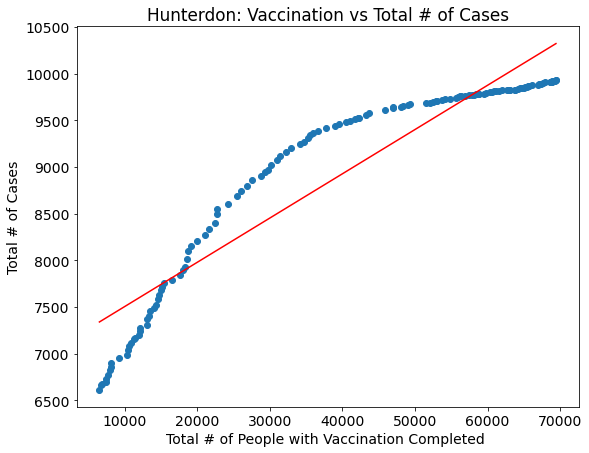

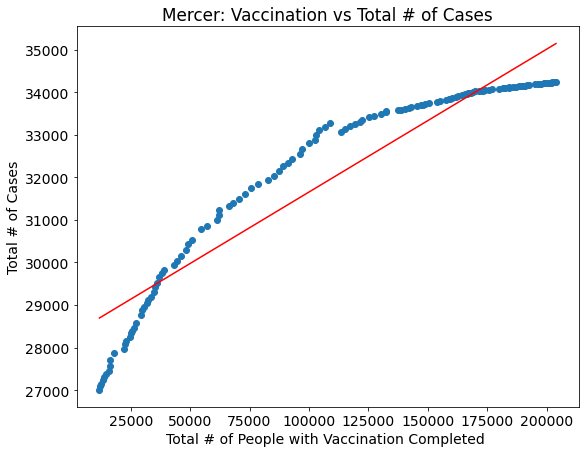

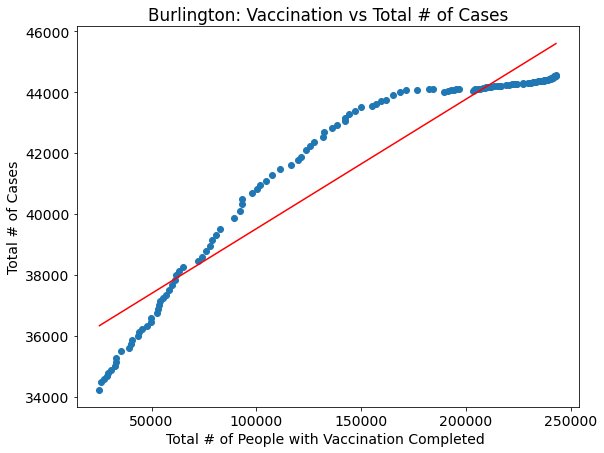

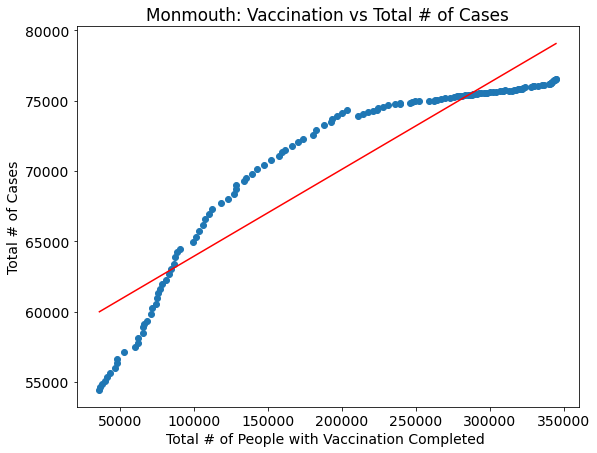

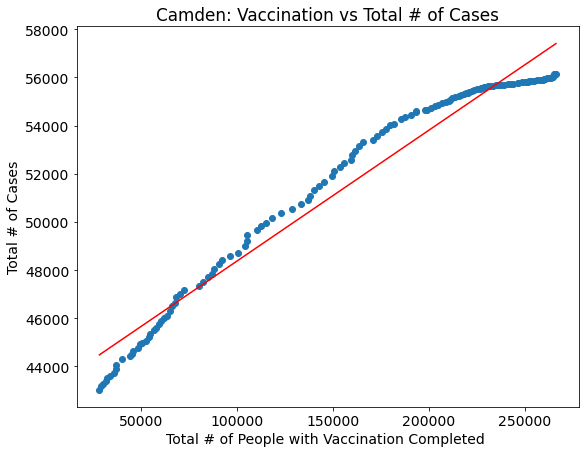

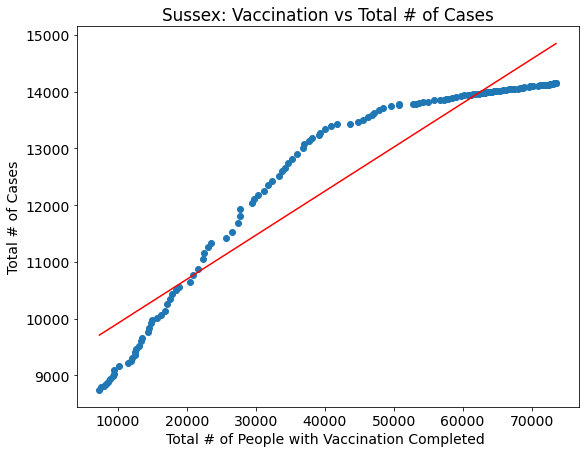

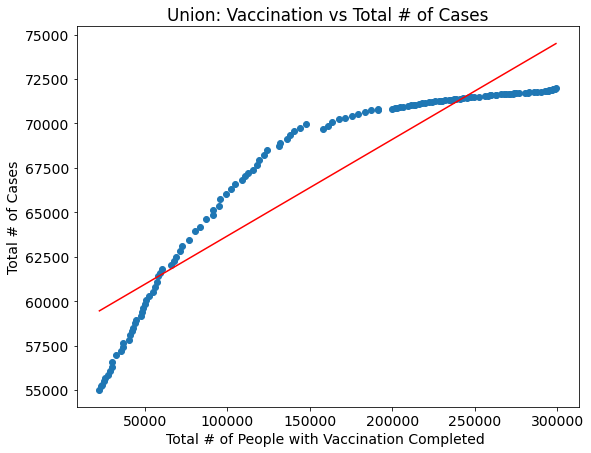

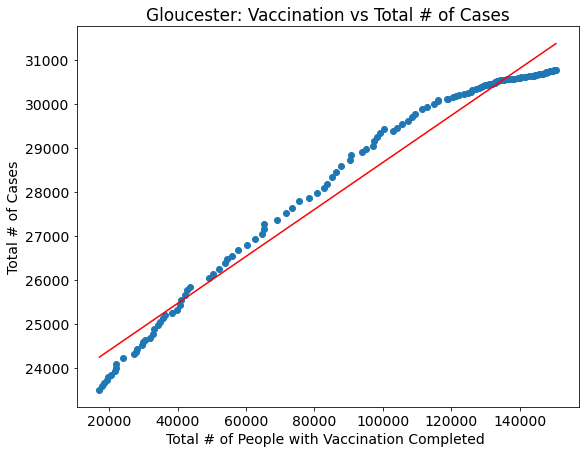

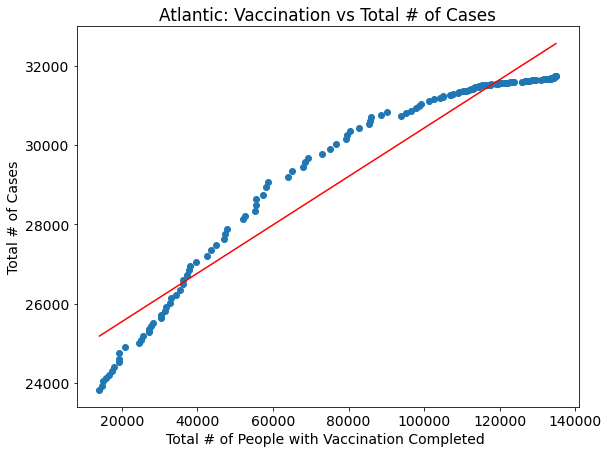

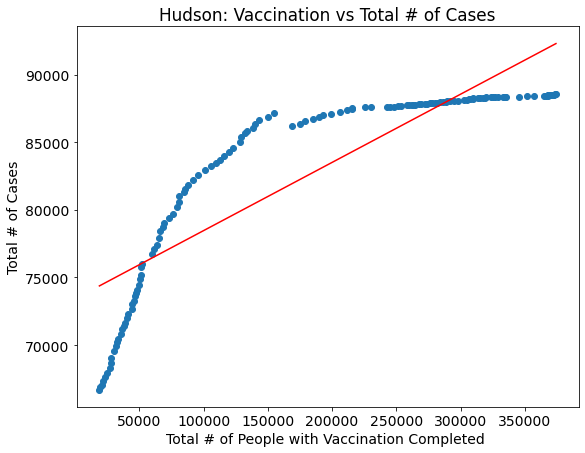

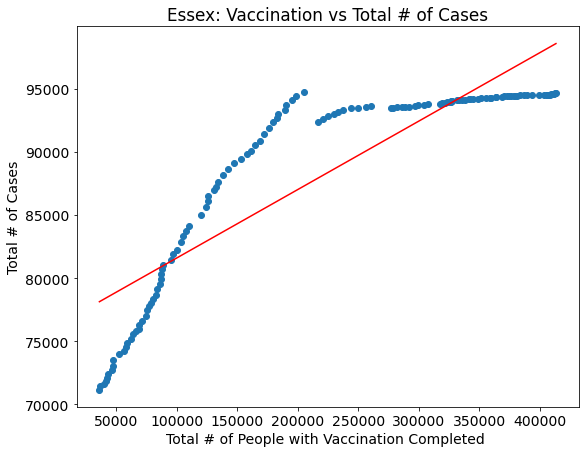

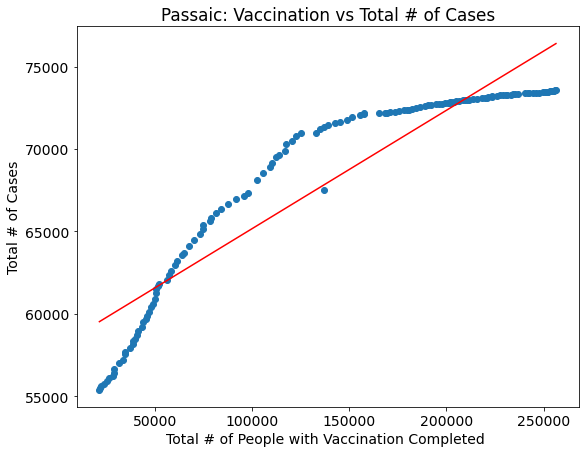

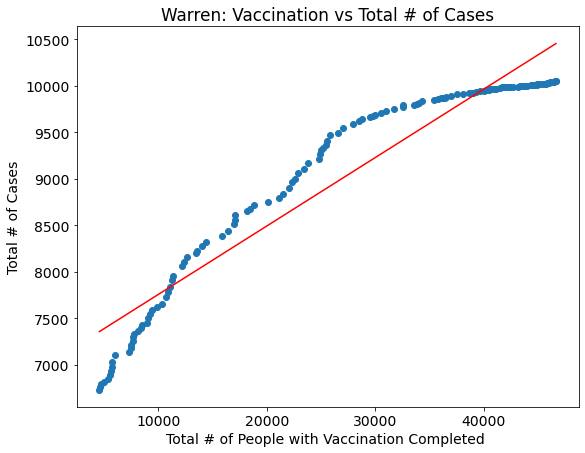

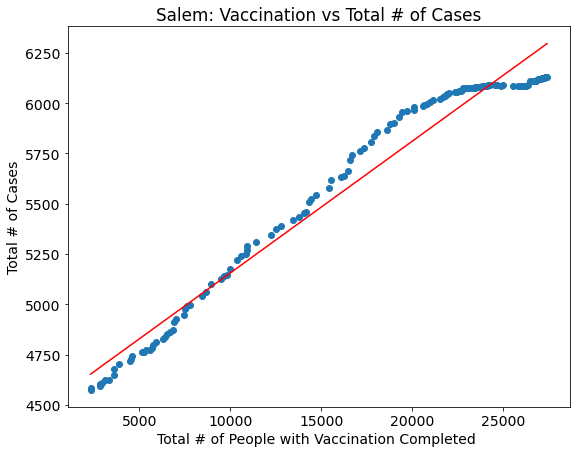

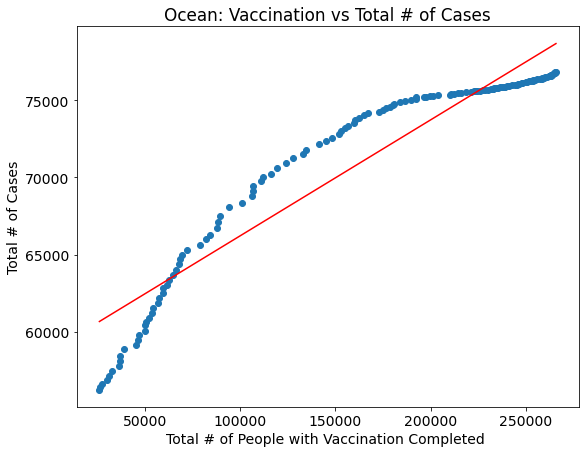

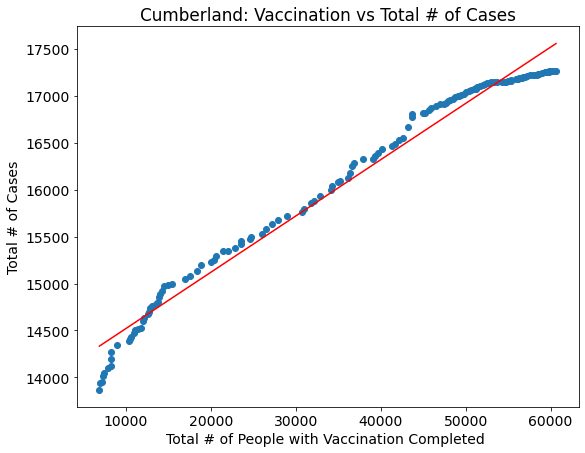

In [427]:
#Any County in NJ (from county_list) 
R_V = []
line_equation = []

for onecounty in county_list:
    print(onecounty)
    
    one_county = nc_vaccine_df.loc[nc_vaccine_df ['County'] == onecounty]

    #plot: setting x_values, y_values 
    x_values =one_county["Vaccination Completed"]
    y_values =  one_county["Total New Cases"]

    from scipy import stats
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values, creating line equation string
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    line_equation.append([line_eq])
    #print(line_eq)

    # Create Plot
    plt.figure(figsize=(9,7))
    x_values = one_county["Vaccination Completed"]
    y_values =  one_county["Total New Cases"]
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.title(onecounty + ": Vaccination vs Total # of Cases")
    plt.ylabel("Total # of Cases")
    plt.xlabel("Total # of People with Vaccination Completed ")

    #plt.annotate(line_eq,(35000,14250),fontsize=15,color="red")

    print(f"The r-squared is: {rvalue**2}")
    R_V.append([rvalue**2])
    
    #plt.text(35000,14000, (f" The r-squared is: {rvalue**2}"), fontsize = 12, color ="b")
    #plt.savefig("../Images/Linear_regr_Vaccinaction_"+onecounty+".png")
    
Linear_Regression_Values =pd.DataFrame({'County':county_list,'R-squared': R_V, 'Line Equation': line_equation})    
Linear_Regression_Values

In [318]:
lin_regress_csv_data = Linear_Regression_Values.to_csv('LinRegress.csv', index = False)
